In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import os
import glob
import cv2

In [23]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from PIL import Image 
from pathlib import Path
from keras.models import Sequential,Model,load_model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input,Flatten,Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=ea50ff236f6950154a60a667b94303730a2893a1b2d415b5e7710e3de60dbefd
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from imutils import paths
import cv2

In [9]:
imagePaths=list(paths.list_images("Clean"))
(train_images,train_labels)=imagePaths.load_dataset()

AttributeError: 'list' object has no attribute 'load_dataset'

ValueError: too many values to unpack (expected 2)

In [24]:
print(os.listdir("Water_samples/"))

['Test', 'Test.zip', 'Train', 'Train.zip', 'val']


In [25]:
data_dir=Path("Water_samples/")
train_dir=data_dir/'train'
test_dir=data_dir/'test'

In [26]:
def load_train():
    polluted_water_dir = train_dir/'Polluted'
    clean_water_dir = train_dir/'Clean'
    mud_water_dir = train_dir/'Mud'
    algae_water_dir = train_dir/'Algae'
    
    polluted_water=polluted_water_dir.glob('*.jpg')
    clean_water=clean_water_dir.glob('*.jpg')
    mud_water=mud_water_dir.glob('*.jpg')
    algae_water=algae_water_dir.glob('*.jpg')
    
    polluted_water1=polluted_water_dir.glob('*.png')
    clean_water1=clean_water_dir.glob('*.png')
    mud_water1=mud_water_dir.glob('*.png')
    algae_water1=algae_water_dir.glob('*.png')
    train_data=[]
    train_label=[]
    for img in polluted_water:
        train_data.append(img)
        train_label.append("Polluted_water")
    for img in clean_water:
        train_data.append(img)
        train_label.append("Clean_water")
    for img in mud_water:
        train_data.append(img)
        train_label.append("Mud_water")
    for img in algae_water:
        train_data.append(img)
        train_label.append("Algae_water")
    
    for img in polluted_water1:
        train_data.append(img)
        train_label.append("Polluted_water")
    for img in clean_water1:
        train_data.append(img)
        train_label.append("Clean_water")
    for img in mud_water1:
        train_data.append(img)
        train_label.append("Mud_water")
    for img in algae_water1:
        train_data.append(img)
        train_label.append("Algae_water")
    df=pd.DataFrame(train_data)
    df.columns=['images']
    df['labels']=train_label
    df=df.sample(frac=1).reset_index(drop=True)
    return df

In [27]:
train_data=load_train()
train_data.shape

(1600, 2)

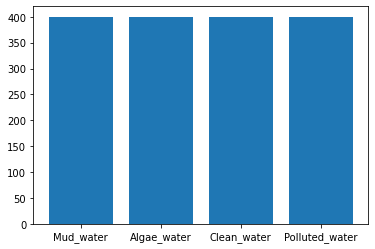

In [28]:
plt.bar(train_data['labels'].value_counts().index,train_data['labels'].value_counts().values)
plt.show()

In [ ]:
def load_train():
    polluted_water_dir = train_dir/'Polluted'
    clean_water_dir = train_dir/'Clean'
    mud_water_dir = train_dir/'Mud'
    algae_water_dir = train_dir/'Algae'
    
    polluted_water=polluted_water_dir.glob('*.jpg')
    clean_water=clean_water_dir.glob('*.jpg')
    mud_water=mud_water_dir.glob('*.jpg')
    algae_water=algae_water_dir.glob('*.jpg')
    
    polluted_water1=polluted_water_dir.glob('*.png')
    clean_water1=clean_water_dir.glob('*.png')
    mud_water1=mud_water_dir.glob('*.png')
    algae_water1=algae_water_dir.glob('*.png')
    train_data=[]
    train_label=[]
    for img in polluted_water:
        train_data.append(img)
        train_label.append("Polluted_water")
    for img in clean_water:
        train_data.append(img)
        train_label.append("Clean_water")
    for img in mud_water:
        train_data.append(img)
        train_label.append("Mud_water")
    for img in algae_water:
        train_data.append(img)
        train_label.append("Algae_water")
    
    for img in polluted_water1:
        train_data.append(img)
        train_label.append("Polluted_water")
    for img in clean_water1:
        train_data.append(img)
        train_label.append("Clean_water")
    for img in mud_water1:
        train_data.append(img)
        train_label.append("Mud_water")
    for img in algae_water1:
        train_data.append(img)
        train_label.append("Algae_water")
    df=pd.DataFrame(train_data)
    df.columns=['images']
    df['labels']=train_label
    df=df.sample(frac=1).reset_index(drop=True)
    return df

# New model

In [94]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [95]:
TRAIN_DIR="./DATASET"
ORG_DIR="Clean"
CLASS=['clean','polluted','mud','algae']

In [96]:
for C in CLASS:
    DEST=os.path.join(TRAIN_DIR,C)
    
    if not os.path.exists(DEST):
        os.makedirs(DEST)
        
    for img_path in glob.glob(os.path.join(ORG_DIR,C)+"*"):
        SRC=img_path
        shutil.copy(SRC,DEST)

# Model building

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras_preprocessing.image import ImageDataGenerator, load_img,img_to_array


In [3]:
base_model=InceptionV3(input_shape=(150,150,3),include_top=False)

In [99]:
for layer in base_model.layers:
    layer.trainable=False

In [100]:
X=Flatten()(base_model.output)
X=Dense(units=4,activation='sigmoid')(X)

#Final Model
model=Model(base_model.input,X)

#Compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                            

 batch_normalization_198 (Batch  (None, 16, 16, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 16, 16, 32)  96          ['conv2d_199[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_195[0][0]']
                                                                                                  
 activatio

 conv2d_208 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_normalization_208 (Batch  (None, 16, 16, 48)  144         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 16, 16, 96)  288         ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_222 (Batch  (None, 7, 7, 128)   384         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 conv2d_223 (Conv2D)            (None, 7, 7, 128)    114688      ['activation_222[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_233 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_232[0][0]']         
                                                                                                  
 batch_normalization_233 (Batch  (None, 7, 7, 160)   480         ['conv2d_233[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_233 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_233[0][0]']
          

                                                                                                  
 batch_normalization_243 (Batch  (None, 7, 7, 160)   480         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_243 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_244 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_243[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_249 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_253[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 7, 7, 192)   576         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_254 (Batch  (None, 7, 7, 192)   576         ['conv2d_254[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_258 (Batch  (None, 7, 7, 192)   576         ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 7, 7, 192)   576         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_258 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_262 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 conv2d_25

                                                                                                  
 activation_267 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_271 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_271[0][0]']
                                                                                                  
 batch_normalization_272 (Batch  (None, 3, 3, 192)   576         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_281 (Batch  (None, 3, 3, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_273 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_273[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_275[0][0]',         
                                                                  'activation_276[0][0]']         
                                                                                                  
 concatenate_5 (Concatenate)    (None, 3, 3, 768)    0           ['activation_279[0][0]',         
          

# Pre-process data

In [102]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory="DATASET",
                                             target_size=(150,150),
                                             batch_size=36)

Found 1600 images belonging to 4 classes.


In [103]:
train_data.class_indices

{'algae': 0, 'clean': 1, 'mud': 2, 'polluted': 3}

# Visualizing the data

In [104]:
t_img,label=train_data.next()

In [105]:
t_img.shape

(36, 150, 150, 3)

In [1]:
def plotImages(img_arr,label):
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure()#figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


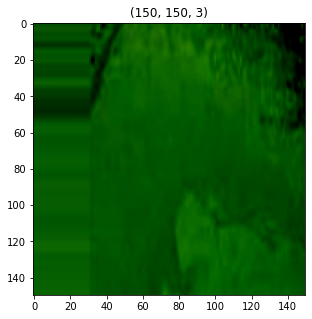

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


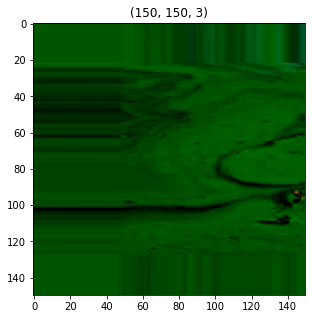

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


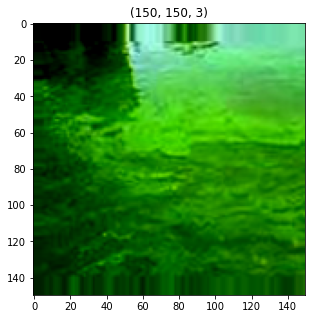

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


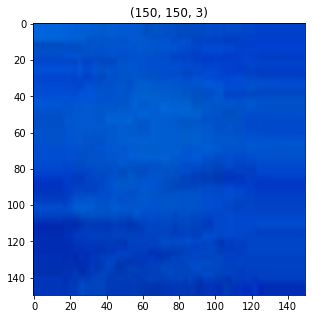

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


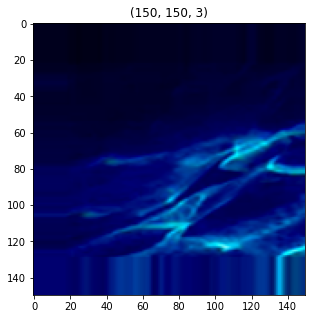

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


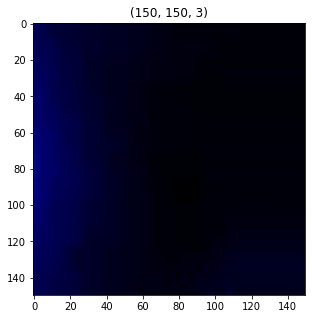

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


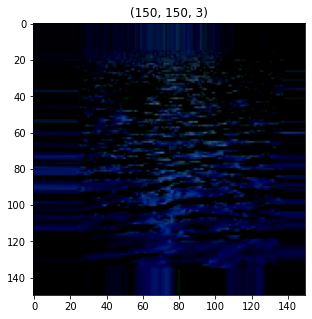

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


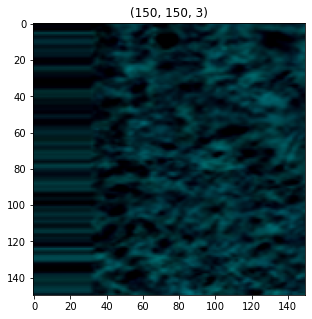

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


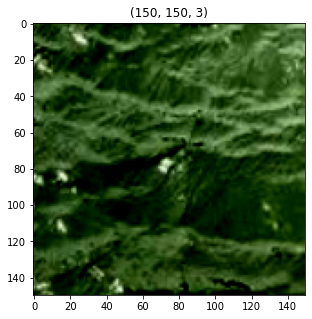

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


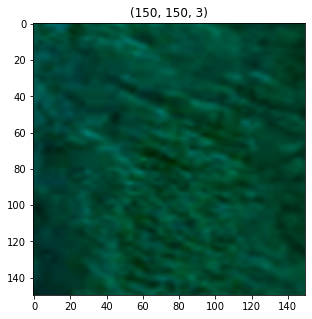

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


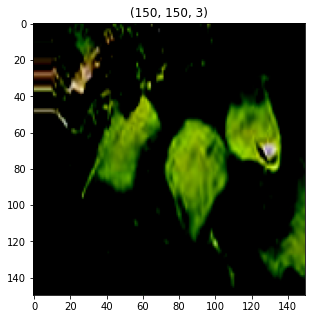

In [107]:
plotImages(t_img,label)

# Model check point

In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_nly=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]

In [109]:
his=model.fit(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.0444 - accuracy: 0.3528
Epoch 1: saving model to .\best_model.h5
10/10 [==============================] - 81s 2s/step - loss: 1.0444 - accuracy: 0.3528
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.6250
Epoch 2: saving model to .\best_model.h5
10/10 [==============================] - 18s 2s/step - loss: 0.6253 - accuracy: 0.6250
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4755 - accuracy: 0.7111
Epoch 3: saving model to .\best_model.h5
10/10 [==============================] - 15s 1s/step - loss: 0.4755 - accuracy: 0.7111
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.7382
Epoch 4: saving model to .\best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 0.3952 - accuracy: 0.7382
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.8206
Epoch 5: saving mo

In [110]:
from keras.models import load_model

model=load_model("best_model.h5")

In [111]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

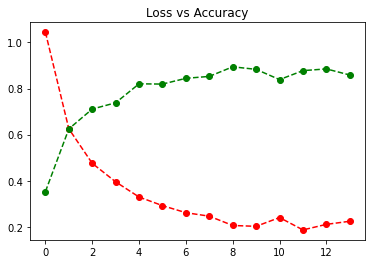

In [112]:
plt.plot(h['loss'],'go--',c="red")
plt.plot(h['accuracy'],'go--',c="green")

plt.title("Loss vs Accuracy")
plt.show()

# validating the data

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of polluted water


<function matplotlib.pyplot.show(close=None, block=None)>

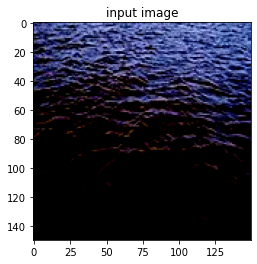

In [114]:
path="Water_samples/Test/Polluted/p1.jpg"
img=load_img(path,target_size=(150,150))

i=img_to_array(img)
i=preprocess_input(i)
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
    print("The image is of Algae water")
elif pred==1:
    print("The image is of clean water")
elif pred==2:
    print("The image is of mud water")
else:
    print("The image is of polluted water")
    
#to display the image

plt.imshow(input_arr[0])
plt.title("input image")
plt.show